In [1]:
import matplotlib.pyplot as plt

from data_manager.code.load_dataset import rgb_read_image

image_raw = rgb_read_image("../data_manager/storage/raw/train/rps/paper/paper01-000.png")
image_float = image_raw.float() / 255

In [2]:
from einops import rearrange
import torch

def display_image(image: torch.Tensor):
    r_img = rearrange(image, "1 c w h -> w h c")
    plt.imshow(r_img)

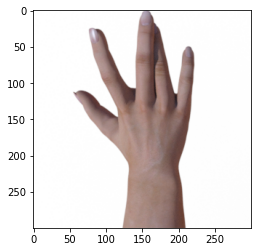

In [5]:
display_image(image_float)

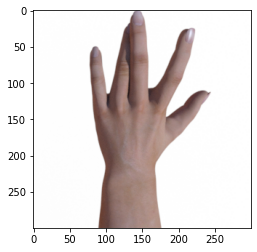

In [6]:
from torchvision.transforms import RandomHorizontalFlip

f = RandomHorizontalFlip(p=1)
display_image(f(image_float))

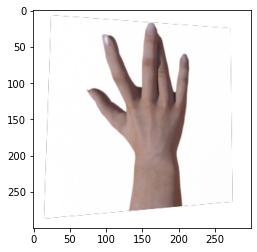

In [7]:
from torchvision.transforms import RandomPerspective

f = RandomPerspective(distortion_scale=0.3, p=1, fill=1)
display_image(f(image_float))

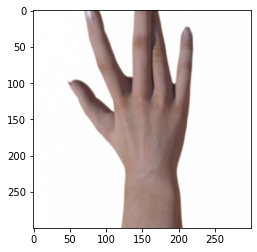

In [8]:
from torchvision.transforms import RandomResizedCrop

f = RandomResizedCrop(size=300, scale=(0.65, 0.90))
display_image(f(image_float))

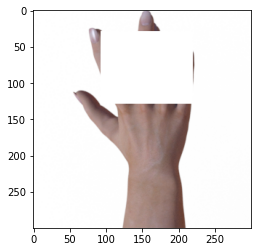

In [9]:
from torchvision.transforms import RandomErasing

f = RandomErasing(p=1, value=1)
display_image(f(image_float))

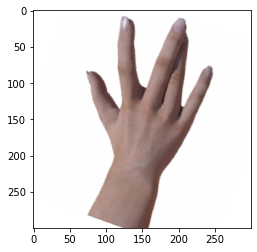

In [10]:
from torchvision.transforms import RandomAffine

f = RandomAffine(degrees=30, fill=1)
display_image(f(image_float))

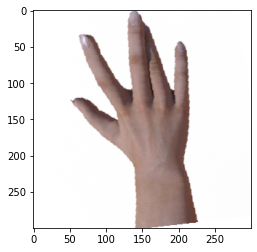

In [11]:
from torchvision.transforms import RandomRotation

f = RandomRotation(degrees=30, fill=1)
display_image(f(image_float))

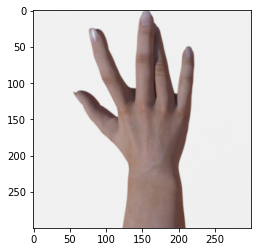

In [12]:
from torchvision.transforms import ColorJitter

f = ColorJitter(brightness=(0.8, 1.0))
display_image(f(image_float))

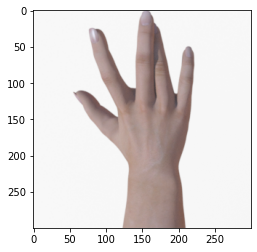

In [13]:
from torchvision.transforms import ColorJitter

f = ColorJitter(contrast=(0.8, 1.0))
display_image(f(image_float))

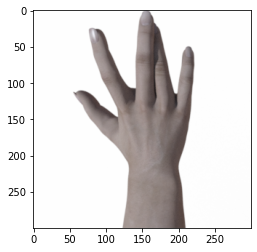

In [14]:
from torchvision.transforms import ColorJitter

f = ColorJitter(saturation=(0.0, 1.0))
display_image(f(image_float))

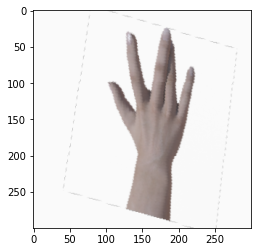

In [18]:
from torch import nn

f = nn.Sequential(
    RandomHorizontalFlip(),
    RandomPerspective(fill=1),
    RandomResizedCrop(size=300, scale=(0.90, 1.00)),
    RandomErasing(value=1, scale=(0.1, 0.15)),
    RandomAffine(degrees=30, fill=1),
    RandomRotation(degrees=30, fill=1),
    ColorJitter(brightness=(0.8, 1.0)),
    ColorJitter(contrast=(0.8, 1.0)),
    ColorJitter(saturation=(0.5, 1.0)),
)

augmented = f(image_float)

display_image(augmented)